## 4 Preprocessing and Training Data Development
###  * 4.1 Importing Data
###  * 4.2 Feature Engineering and Cleaning Dataset
    * 4.2.1 Examine the variables and null values
    * 4.2.2 Feature Engineering categorical variables
###  * 4.3 Standardize Data Test and Split Data
    * 4.3.1 Test and Split and Standardize
###  * 4.4 Principle Component Analysis

## 4.1 Imporing Data

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
file = '../Capstone_Project2/Raw_data/df_after_wrangling.csv'
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,...,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,2711280
2,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,...,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7,17073171
3,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,...,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,28103550
7,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,2641691
10,5,LaMarcus Aldridge\aldrila01,C,35,BRK,5,5,26.0,5.0,9.6,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,2641691


In [3]:
df.isna().any()

Rk        False
Player    False
Pos       False
Age       False
Tm        False
G         False
GS        False
MP        False
FG        False
FGA       False
FG%       False
3P        False
3PA       False
3P%        True
2P        False
2PA       False
2P%       False
eFG%      False
FT        False
FTA       False
FT%        True
ORB       False
DRB       False
TRB       False
AST       False
STL       False
BLK       False
TOV       False
PF        False
PTS       False
PER       False
TS%       False
3PAr      False
FTr       False
ORB%      False
DRB%      False
TRB%      False
AST%      False
STL%      False
BLK%      False
TOV%      False
USG%      False
OWS       False
DWS       False
WS        False
WS/48     False
OBPM      False
DBPM      False
BPM       False
VORP      False
Salary    False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 1344
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      454 non-null    int64  
 1   Player  454 non-null    object 
 2   Pos     454 non-null    object 
 3   Age     454 non-null    int64  
 4   Tm      454 non-null    object 
 5   G       454 non-null    int64  
 6   GS      454 non-null    int64  
 7   MP      454 non-null    float64
 8   FG      454 non-null    float64
 9   FGA     454 non-null    float64
 10  FG%     454 non-null    float64
 11  3P      454 non-null    float64
 12  3PA     454 non-null    float64
 13  3P%     440 non-null    float64
 14  2P      454 non-null    float64
 15  2PA     454 non-null    float64
 16  2P%     454 non-null    float64
 17  eFG%    454 non-null    float64
 18  FT      454 non-null    float64
 19  FTA     454 non-null    float64
 20  FT%     450 non-null    float64
 21  ORB     454 non-null    float64
 22  D

In [5]:
df.duplicated().any()

False

## 4.2 Cleaning the Data

### 4.2.1 Examine Null Values and Categorical Variables

#### Just by looking at the dataset, we can see that the column 'RK', which is the ranking of the players in the dataset, does not really matter. As a result, we will probably drop the 'RK' column. Moreover, the variable 'TM', which indicates the team the player plays for, could also be dropped, since the team the player plays for is a categorical varialbe that might not have any impact on the players salary. Moreover, we have examined the position argument, which indicates that the position of a player would most likely influence their salaries as point guards in general seem to get paid higher. 

#### What we will do now is to get rid of the 'Rk' and the 'TM' variables. However, instead of completely get rid of the varialbes, we could add 'Tm' to our name variables to make each name unique, and set our new names to be the index.

In [6]:
df['Player'] = df['Player'] + df['Tm'].astype(str)

In [7]:
print(df['Player'].duplicated().any())
df = df.set_index('Player')

False


#### Now that our dataset has a unique index for each observation, now we need to drop the 'Tm' and 'Rk' variables

In [8]:
df.drop(columns=['Rk', 'Tm'],axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, Precious Achiuwa\achiupr01MIA to Ivica Zubac\zubaciv01LAC
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     454 non-null    object 
 1   Age     454 non-null    int64  
 2   G       454 non-null    int64  
 3   GS      454 non-null    int64  
 4   MP      454 non-null    float64
 5   FG      454 non-null    float64
 6   FGA     454 non-null    float64
 7   FG%     454 non-null    float64
 8   3P      454 non-null    float64
 9   3PA     454 non-null    float64
 10  3P%     440 non-null    float64
 11  2P      454 non-null    float64
 12  2PA     454 non-null    float64
 13  2P%     454 non-null    float64
 14  eFG%    454 non-null    float64
 15  FT      454 non-null    float64
 16  FTA     454 non-null    float64
 17  FT%     450 non-null    float64
 18  ORB     454 non-null    float64
 19  DRB     454 non-null    float64
 20  TRB     454 non-null    float64


In [10]:
salary_correlations = df.corr().loc['Salary']
salary_correlations.sort_values(ascending=False)

Salary    1.000000
PTS       0.753240
FG        0.734431
FGA       0.714919
VORP      0.700504
FT        0.691903
FTA       0.669854
2PA       0.652440
TOV       0.647032
MP        0.645760
2P        0.644801
AST       0.638246
WS        0.621979
OBPM      0.595794
OWS       0.595153
GS        0.571355
USG%      0.553499
BPM       0.532728
DRB       0.528392
AST%      0.508455
PER       0.497591
DWS       0.488208
3P        0.487513
3PA       0.483417
STL       0.455381
TRB       0.443612
WS/48     0.351978
PF        0.309866
Age       0.260280
FT%       0.242972
G         0.216306
BLK       0.205603
TS%       0.193518
FTr       0.162424
3P%       0.139626
ORB       0.139121
eFG%      0.108427
DRB%      0.094288
FG%       0.087931
DBPM      0.057979
2P%       0.047926
TRB%      0.013904
STL%      0.005446
TOV%     -0.009379
3PAr     -0.052492
BLK%     -0.061897
ORB%     -0.134637
Name: Salary, dtype: float64

#### From the graph, we can tell that out of the almost 50 variables we have, there are a few variables that we could use to explain most of the salary's variances. Later, we would do a PCA on the data to examine the most important features.

### 4.2.2 Feature Engineering categorical variables
#### Now we are going to make the position arguments into dummy variables.

In [11]:
print(df.groupby('Pos')['Age'].count())

Pos
C      97
PF     91
PG     82
SF     79
SG    105
Name: Age, dtype: int64


In [12]:
df['Pos'].unique()
series_pos = df['Pos']

In [13]:
df = pd.get_dummies(df)

### 4.2.3 Filling Missing Values

In [14]:
df = df.fillna(0)

## 4.3 Standardize Data Test and Split Data

In [15]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,OBPM,DBPM,BPM,VORP,Salary,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,4.540000e+02,454.000000,454.000000,454.000000,454.000000,454.000000
mean,25.966960,43.916300,22.960352,22.850220,3.919604,8.419604,0.466742,1.180396,3.247577,0.318242,...,-0.498678,0.039648,-0.460352,0.654185,9.103413e+06,0.213656,0.200441,0.180617,0.174009,0.231278
std,4.248491,19.590331,23.087858,8.123187,2.269588,4.745942,0.086830,0.937089,2.367240,0.124350,...,2.800630,1.222495,3.264028,1.180757,9.908377e+06,0.410339,0.400772,0.385125,0.379535,0.422115
min,19.000000,1.000000,0.000000,3.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,-7.800000,-2.700000,-9.600000,-1.700000,8.557800e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,26.250000,3.000000,17.400000,2.300000,4.800000,0.418000,0.400000,1.325000,0.288500,...,-2.200000,-0.800000,-2.300000,0.000000,2.170498e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,47.000000,13.000000,23.350000,3.500000,7.600000,0.450000,1.000000,2.850000,0.348000,...,-0.800000,0.000000,-0.700000,0.300000,4.807076e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,61.000000,40.750000,29.675000,5.075000,10.975000,0.504750,1.800000,4.900000,0.390000,...,0.900000,0.700000,1.100000,1.000000,1.259971e+07,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,1.000000,...,24.100000,8.200000,31.100000,8.800000,4.578097e+07,1.000000,1.000000,1.000000,1.000000,1.000000


#### From the graph, we can see that most features are not scaled, so we will use a standard scaler variables along with 

We first split the data into X and y data. Then, we will use 30% of the data we have to test and split the data.

In [16]:
ss = StandardScaler()
X = df.loc[:, ~df.columns.isin(['Salary'])]
y = df.loc[:, 'Salary']

X_scaled = ss.fit_transform(X)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,WS/48,OBPM,DBPM,BPM,VORP,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa\achiupr01MIA,21,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,...,0.085,-3.6,-0.5,-4.1,-0.4,0,1,0,0,0
Steven Adams\adamsst01NOP,27,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,...,0.119,-0.4,0.1,-0.3,0.7,1,0,0,0,0
Bam Adebayo\adebaba01MIA,23,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,...,0.197,2.9,2.0,4.9,3.7,1,0,0,0,0
LaMarcus Aldridge\aldrila01SAS,35,21,18,25.9,5.5,11.8,0.464,1.3,3.6,0.360,...,0.080,-0.2,-0.2,-0.3,0.3,1,0,0,0,0
LaMarcus Aldridge\aldrila01BRK,35,5,5,26.0,5.0,9.6,0.521,0.8,1.0,0.800,...,0.080,-0.2,-0.2,-0.3,0.3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright\wrighde01SAC,28,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,...,0.117,0.6,1.5,2.2,1.8,0,0,1,0,0
Thaddeus Young\youngth01CHI,32,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,...,0.147,1.9,1.4,3.3,2.2,0,1,0,0,0
Trae Young\youngtr01ATL,22,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,...,0.163,5.3,-1.7,3.7,3.0,0,0,1,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=100)

In [29]:
df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DBPM,BPM,VORP,Salary,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Status
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa\achiupr01MIA,21,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,...,-0.5,-4.1,-0.4,2711280,0,1,0,0,0,0.0
Steven Adams\adamsst01NOP,27,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,...,0.1,-0.3,0.7,17073171,1,0,0,0,0,1.0
Bam Adebayo\adebaba01MIA,23,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,...,2.0,4.9,3.7,28103550,1,0,0,0,0,2.0
LaMarcus Aldridge\aldrila01SAS,35,21,18,25.9,5.5,11.8,0.464,1.3,3.6,0.360,...,-0.2,-0.3,0.3,2641691,1,0,0,0,0,0.0
LaMarcus Aldridge\aldrila01BRK,35,5,5,26.0,5.0,9.6,0.521,0.8,1.0,0.800,...,-0.2,-0.3,0.3,2641691,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright\wrighde01SAC,28,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,...,1.5,2.2,1.8,8526316,0,0,1,0,0,0.0
Thaddeus Young\youngth01CHI,32,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,...,1.4,3.3,2.2,14190000,0,1,0,0,0,1.0
Trae Young\youngtr01ATL,22,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,...,-1.7,3.7,3.0,8326471,0,0,1,0,0,0.0


In [19]:
datapath = '../Capstone_Project2/'
df.to_csv("../Capstone_Project2/clean_df.csv")

In [20]:
pd.DataFrame(X_train).to_csv("../Capstone_Project2/X_train.csv")

In [21]:
pd.DataFrame(y_train).to_csv("../Capstone_Project2/y_train.csv")

In [22]:
pd.DataFrame(X_test).to_csv("../Capstone_Project2/X_test.csv")

In [23]:
pd.DataFrame(y_test).to_csv("../Capstone_Project2/y_test.csv")

#### Now that we have saved our clean dataframes, test data, and trained data

## 4.4 Principle Component Analysis

In [24]:
from matplotlib.colors import ListedColormap as clp
from sklearn.decomposition import PCA

#### We will do a quick PCA to determine which of our features are the most important ones. We want to see if we can do a KMeans to make the dataset into 3 clusters. The reason for the 3 cluster is that we want to split the player into three clusters based on their salaries.

We will engineer the features into several categories. The players with lower than 10M for the salary will be low, and 10M to 20M will be mid, and the rest is high.

In [25]:
temp = np.array([])
for i in df['Salary']:
    status = 100
    if i < 10000000:
        status = 0
    elif 10000000 <= i < 20000000:
        status = 1
    else:
        status = 2
    temp = np.append(temp, status)
df['Status'] = temp

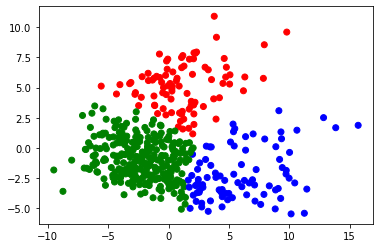

In [26]:
modelK = KMeans(n_clusters=3)
pred = modelK.fit_predict(X_scaled)

modelP = PCA(n_components=2)
new_data = modelP.fit_transform(X_scaled)

x = new_data[:, 0]
y = new_data[:, 1]

plt.scatter(x,y,c=pred, cmap=clp(['red', 'green', 'blue']))

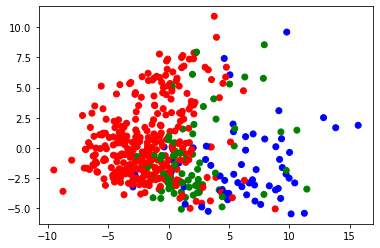

In [27]:
plt.scatter(x,y,c=df['Status'], cmap=clp(['red', 'green', 'blue']))

In [28]:
modelP.explained_variance_

array([16.54325573,  9.892996  ])